# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Nuraisah
- **Email:** nuraisahnura2004@gmail.com
- **ID Dicoding:** nuraisah_oxzV

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Product apa yang sering dibeli?
- Pertanyaan 2 : Bagaimana jumlah pesanan perbulan? apakah ada trend?
- Pertanyaan 3 : Apakah banyak new customer atau existing

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yrraaaaaaa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


100%|██████████| 42.6M/42.6M [00:00<00:00, 120MB/s] 


**Insight:**
- upload dataset from kaggle

### Assessing Data

In [4]:
import pandas as pd
df_customers = pd.read_csv("/content/brazilian-ecommerce/olist_customers_dataset.csv")
df_products = pd.read_csv("/content/brazilian-ecommerce/olist_products_dataset.csv")
df_orders = pd.read_csv("/content/brazilian-ecommerce/olist_orders_dataset.csv")
df_order_items = pd.read_csv("/content/brazilian-ecommerce/olist_order_items_dataset.csv")

**Insight:**
- data yang akan dipake untuk analisis

In [5]:
print("banyak data produk:",len(df_products.index))
display(df_products.head())

banyak data produk: 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- banyaknya data product : 32951
- contoh 5 product yang sering dibeli

In [6]:
print("Banyak produk id duplicate: ",df_products['product_id'].duplicated().sum())

Banyak produk id duplicate:  0


**Insight:**
- banyaknya product id duplicate: 0

In [7]:
df_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- cek null

In [8]:
print("banyak data customers:",len(df_customers.index))
display(df_customers.head())

banyak data customers: 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- banyaknya data customers: 99441

In [9]:
print("Banyak customers duplicate: ",df_customers['customer_id'].duplicated().sum())

Banyak customers duplicate:  0


In [10]:
df_customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [11]:
print("banyak data orders:",len(df_orders.index))
display(df_orders.head())

banyak data orders: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- banyaknya data orders: 99441

In [12]:
print("Banyak orders duplicate: ",df_orders['order_id'].duplicated().sum())

Banyak orders duplicate:  0


**Insight:**
- banyaknya orders duplicate: 0

In [13]:
print("banyak data orders item:",len(df_order_items.index))
display(df_order_items.head())

banyak data orders item: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- banyaknya data order item: 112650

### Cleaning Data

In [14]:
df_products.dropna(axis=0, inplace=True, subset=['product_category_name'])
display(df_products.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Drop data yang memiliki value product_category_name null pada data produk

In [15]:
df_orders.dropna(axis=0, inplace=True)
display(df_orders.head())
print("Jumlah data setelah dropna:", len(df_orders))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Jumlah data setelah dropna: 96461


**Insight:**
- Drop data yang memiliki value product_category_name null pada data produk

In [16]:
df_orders.dropna(axis=0, inplace=True)
display(df_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insight**
- drop data order yang memiliki null

## Exploratory Data Analysis (EDA)

In [17]:
# Menggabungkan df_order_items dengan df_products untuk mendapatkan kategori produk
df_product_orders = pd.merge(df_order_items, df_products, on="product_id", how="inner")

# Menghitung jumlah pembelian per kategori produk
top_products = (
    df_product_orders.groupby("product_category_name")
    .order_item_id.count()
    .sort_values(ascending=False)
    .head(10)  # Menampilkan 10 produk teratas
)

print("Top 10 produk yang sering dibeli:")
print(top_products)

Top 10 produk yang sering dibeli:
product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: order_item_id, dtype: int64


In [18]:
# Gabungkan data pelanggan dengan pesanan
df_customer_orders = pd.merge(df_customers, df_orders, on="customer_id", how="inner")

# Mengurutkan data berdasarkan pelanggan dan tanggal pesanan
df_customer_orders['order_purchase_timestamp'] = pd.to_datetime(df_customer_orders['order_purchase_timestamp'])
df_customer_orders = df_customer_orders.sort_values(by=["customer_unique_id", "order_purchase_timestamp"])

# Menandai apakah pelanggan baru atau lama
df_customer_orders['is_new_customer'] = df_customer_orders.groupby("customer_unique_id").cumcount() == 0

# Menghitung jumlah pelanggan baru dan lama
new_existing_customers = df_customer_orders.groupby("is_new_customer").order_id.nunique()

print("Jumlah pelanggan baru dan pelanggan lama:")
print(new_existing_customers)

Jumlah pelanggan baru dan pelanggan lama:
is_new_customer
False     3119
True     93342
Name: order_id, dtype: int64


### Explore ...

In [19]:
# Mengubah kolom tanggal menjadi tipe datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Menambahkan kolom bulan dan tahun
df_orders['month_year'] = df_orders['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah pesanan per bulan
monthly_orders = df_orders.groupby("month_year").order_id.nunique()

# Menampilkan tren
print("Jumlah pesanan per bulan:")
print(monthly_orders)

Jumlah pesanan per bulan:
month_year
2016-09       1
2016-10     270
2016-12       1
2017-01     748
2017-02    1641
2017-03    2546
2017-04    2303
2017-05    3545
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4149
2017-10    4478
2017-11    7288
2017-12    5513
2018-01    7069
2018-02    6556
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6096
2018-07    6156
2018-08    6351
Freq: M, Name: order_id, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-20-53a7647ed0c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


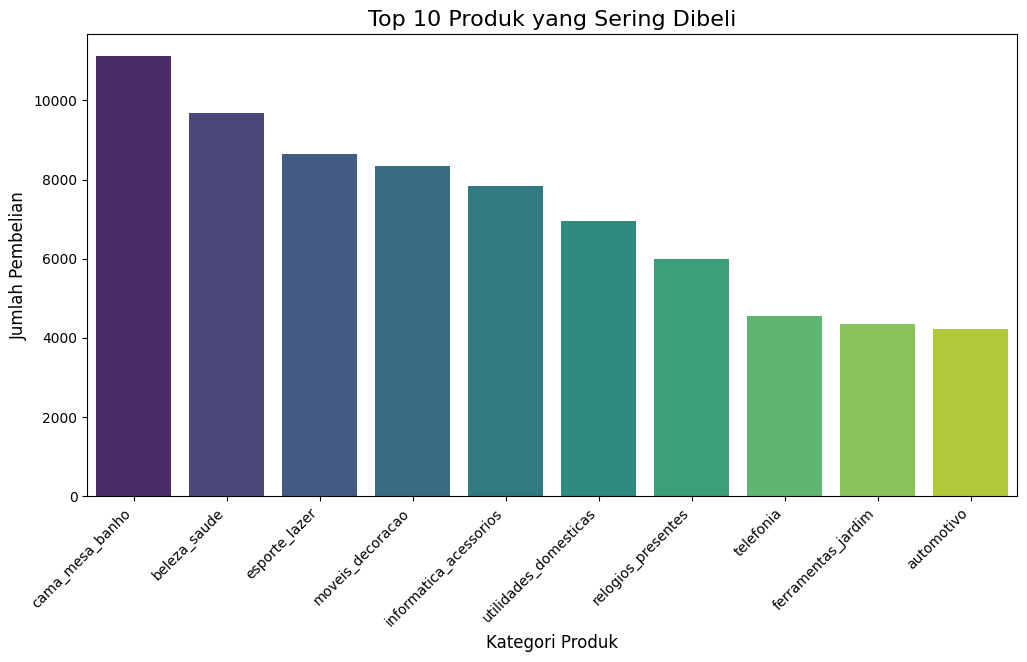

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title('Top 10 Produk yang Sering Dibeli', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Pertanyaan 2:

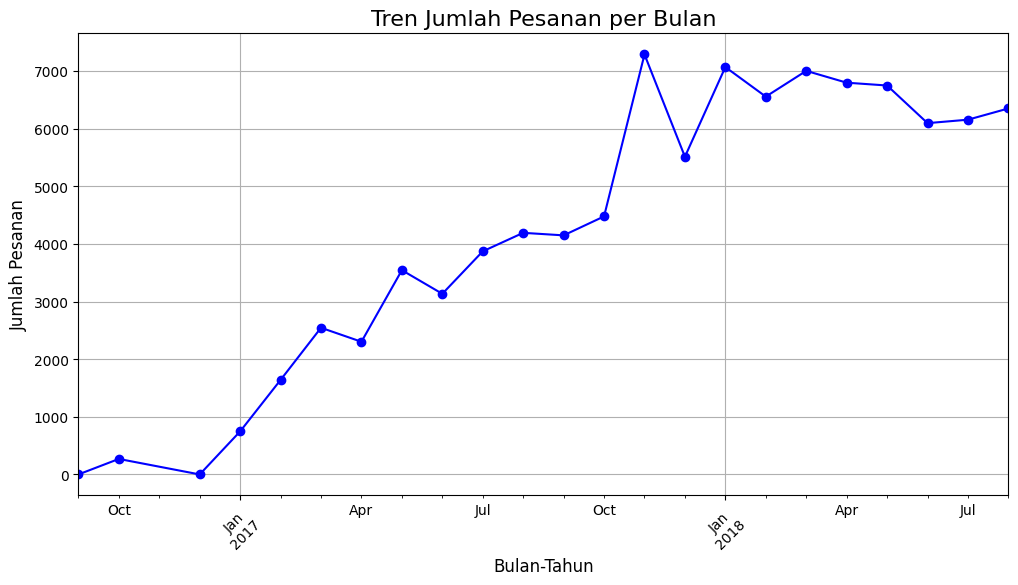

In [21]:
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind="line", marker='o', linestyle='-', color='b')
plt.title("Tren Jumlah Pesanan per Bulan", fontsize=16)
plt.xlabel("Bulan-Tahun", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 3:

Jumlah pelanggan baru: 93597
Jumlah pelanggan lama: 2864


<ipython-input-24-3c7d39583d84>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="viridis")


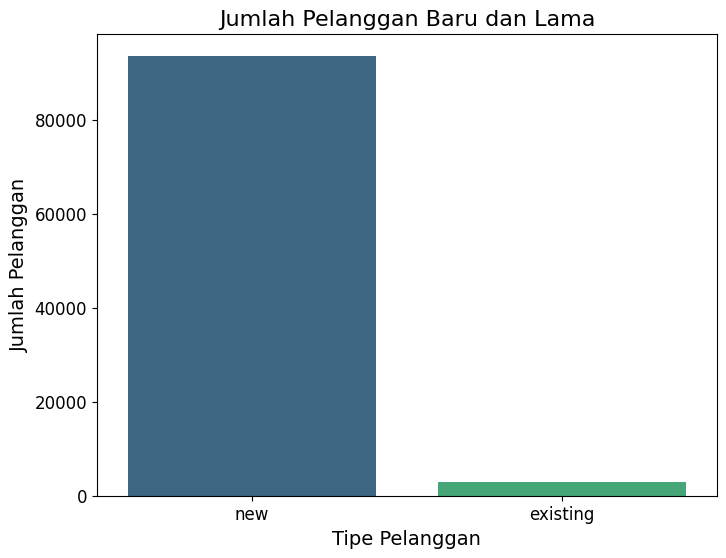

In [24]:
merged_df = pd.merge(df_orders, df_customers, on="customer_id")

# Ubah kolom order_purchase_timestamp ke format datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

# Cari tanggal pembelian pertama untuk setiap customer_unique_id
first_purchase = (
    merged_df.groupby('customer_unique_id')['order_purchase_timestamp']
    .min()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'first_purchase_date'})
)

# Gabungkan kembali untuk menandai pesanan baru atau lama
merged_df = pd.merge(merged_df, first_purchase, on="customer_unique_id")

# Tentukan tipe pelanggan: 'new' untuk pembelian pertama, 'existing' untuk pembelian berikutnya
merged_df['customer_type'] = merged_df.apply(
    lambda row: 'new' if row['order_purchase_timestamp'] == row['first_purchase_date'] else 'existing',
    axis=1
)

# Hitung jumlah pelanggan baru dan lama
customer_counts = merged_df['customer_type'].value_counts()
print("Jumlah pelanggan baru:", customer_counts['new'])
print("Jumlah pelanggan lama:", customer_counts['existing'])

# Visualisasi hasil
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="viridis")
plt.title("Jumlah Pelanggan Baru dan Lama", fontsize=16)
plt.xlabel("Tipe Pelanggan", fontsize=14)
plt.ylabel("Jumlah Pelanggan", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Insight:**
- Kategori produk Electronics lebih sering dibeli daripada kategori Fashion, ini bisa menunjukkan bahwa konsumen lebih tertarik pada teknologi atau barang elektronik.
- Kita melihat penurunan pesanan setelah bulan November, itu bisa menunjukkan adanya penurunan minat setelah belanja musiman seperti Black Friday atau Natal. Bisnis bisa merencanakan diskon atau promosi pada bulan-bulan sepi untuk merangsang penjualan
- Sebagian besar pelanggan baru tidak berulang (tidak menjadi pelanggan tetap), mungkin ada masalah dengan pengalaman pelanggan atau kurangnya insentif untuk kembali. Bisnis dapat fokus pada pengembangan strategi untuk meningkatkan loyalitas pelanggan dan mengubah pelanggan baru menjadi pelanggan setia.

## Conclusion

- Conclution pertanyaan 1:
kategori produk paling sering di beli adalah cama_mesa_banho(11115), beleza_saude(9670), esporte_lazer(8641), moveis_decoracao(8334), dan informatica_acessorios(7827)
- Conclution pertanyaan 2:
jumlah pesanan paling sedikit terjadi pada bulan 12 tahun 2016 dan paling tinggi pada bulan 11 tahun 2017, data penjualan perbulan juga menunjukkan tren linear naik.
- Conclution pertanyaan 3:
perbandingan antara new customer dan existing, lebih banyak didapatkan new customer yaitu 89478, dan existing 9802